In [1]:
import torch
import torchvision
import torchvision.transforms.functional as F
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
import matplotlib.pyplot as plt

In [2]:
img0 = read_image("example1.png")
img1 = read_image("example1.png")

# normalized_img = F.normalize(img, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
img0 = img0[:3,:,:]
img0 = img0.unsqueeze(0)
img = F.convert_image_dtype(img0, dtype=torch.float)
img2 = img0.to(torch.float)
print(img.shape, img2.shape, img.dtype, img2.dtype,(img == img2).all())

# i = 0
# for i in range(img.size(2)):
#     for j in range(img.size(3)):
#         if (img[:,:,i,j] != img2[:,:,i,j]).all():
#             print(img[:,:,i,j], img2[:,:,i,j] / 255, img2[:,:,i,j])
#             i += 1
#         if i > 10:
#             break


torch.Size([1, 3, 375, 1242]) torch.Size([1, 3, 375, 1242]) torch.float32 torch.float32 tensor(False)


In [5]:
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(pretrained=True)
# from torchvision.models.detection import fasterrcnn_resnet50_fpn
# model = fasterrcnn_resnet50_fpn(pretrained=True, progress=True)
model.eval()
output = model(img)
# print(output[0])

torch.Size([3, 375, 1242])


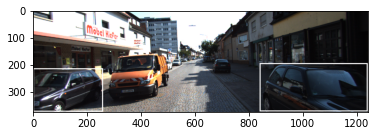

In [4]:
score_threshold = .5
img_with_boxes = draw_bounding_boxes(img1, boxes=output[0]['boxes'][output[0]['scores'] > score_threshold], width=4)
print(img_with_boxes.shape)
img_with_boxes = img_with_boxes.permute(1, 2, 0)
plt.imshow(img_with_boxes)

In [20]:
x = model.backbone(img)['0']
x = model.anchor_generator(x)
x = model.head(x)
print(x)


TypeError: forward() missing 1 required positional argument: 'feature_maps'